In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
## Load Data

In [30]:
df = pd.read_excel('/Users/vidhudinil/Downloads/iris(2).xls')

In [31]:
## Analysis and Preprocessing

In [32]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [34]:
df.dtypes


SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [35]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

In [36]:
features_with_na

['SL', 'SW', 'PL']

In [37]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(),2), '% missing values')

SL 0.05 % missing values
SW 0.04 % missing values
PL 0.04 % missing values


In [38]:
df.shape


(150, 5)

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

<AxesSubplot:>

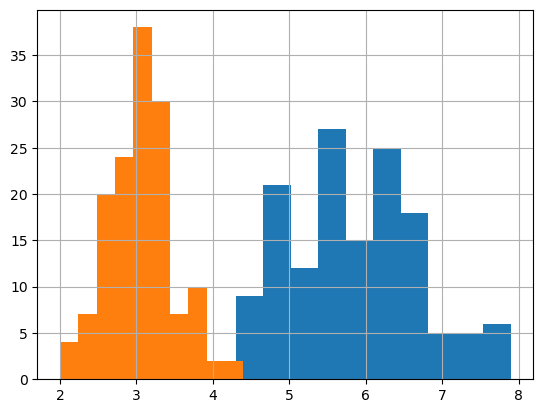

In [41]:
df['SL'].hist()
df['SW'].hist()

<AxesSubplot:>

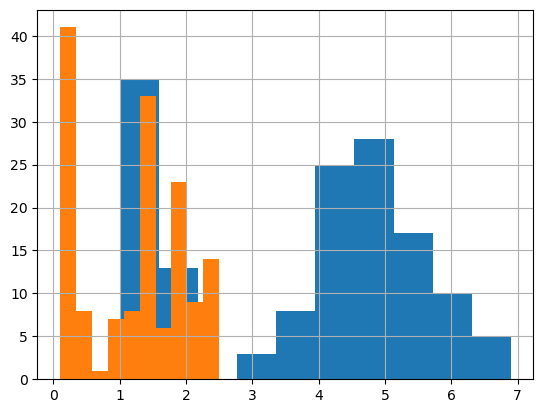

In [42]:
df['PL'].hist()
df['PW'].hist()

<AxesSubplot:>

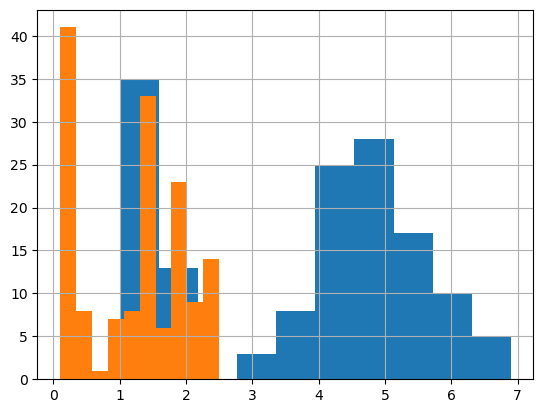

In [43]:
df['PL'].hist()

df['PW'].hist()

In [44]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102511,0.873444,0.821584
SW,-0.102511,1.000000,-0.428465,-0.346900
PL,0.873444,-0.428465,1.000000,0.961679
PW,0.821584,-0.346900,0.961679,1.000000


In [45]:
df.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [46]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [47]:
## Missing Values

In [48]:
cat_cols=df[['SL', 'SW','PL']]

In [49]:
from sklearn.impute import SimpleImputer

In [50]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median') 

In [51]:
imputer=imputer.fit(cat_cols)

In [52]:
cat_cols=imputer.transform(cat_cols)

In [53]:
type(cat_cols)

numpy.ndarray

In [54]:
cat_cols=pd.DataFrame(cat_cols,columns=['SL', 'SW','PL'])

In [55]:
type(cat_cols)

pandas.core.frame.DataFrame

In [56]:
cat_cols.isna().sum()

SL    0
SW    0
PL    0
dtype: int64

In [57]:
df=df.drop(['SL','SW','PL'],axis = 1)

In [58]:
df=pd.concat([cat_cols,df],axis=1)

In [59]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [60]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [61]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [62]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
corr_matrix = df.corr()

In [64]:
corr_matrix

,SL,SW,PL,PW
SL,1.000000,-0.099107,0.830554,0.800939
SW,-0.099107,1.000000,-0.405531,-0.338655
PL,0.830554,-0.405531,1.000000,0.936089
PW,0.800939,-0.338655,0.936089,1.000000


<AxesSubplot:>

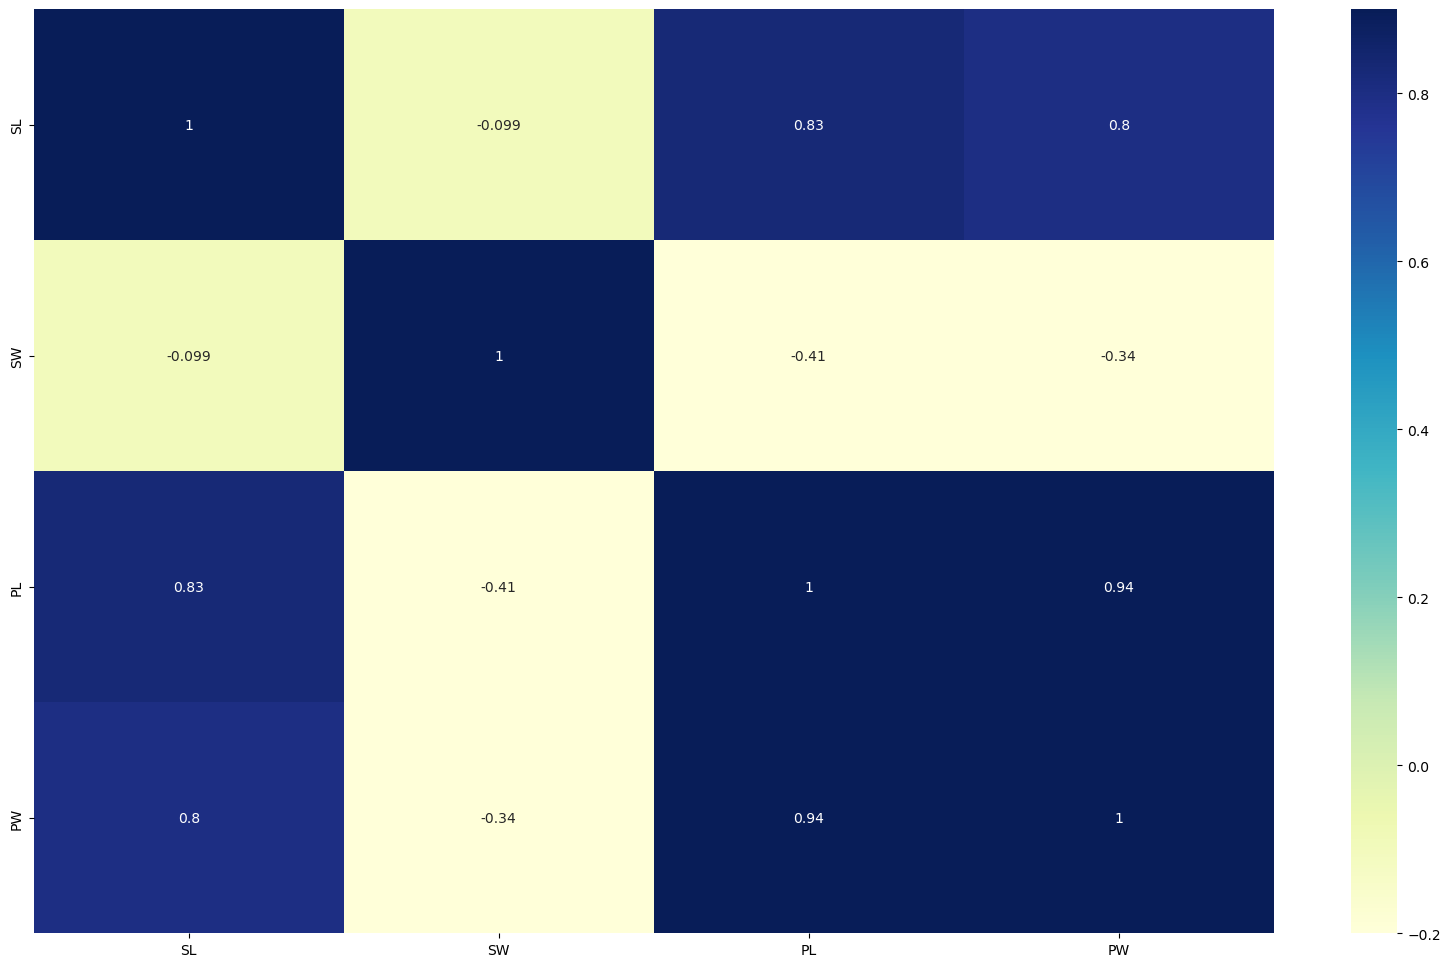

In [65]:
plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix,vmin =-0.2,vmax = 0.9,annot=True,cmap='YlGnBu')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [67]:
x=df.drop('Classification',axis=1)
y=df['Classification']

In [68]:
## Splitting values into Traing and testing

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)


In [70]:
# Create a linear regression model

In [71]:
from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

from sklearn.metrics import classification_report


In [73]:
y_pred = log_model.predict(x_test)


In [74]:
acc_score = accuracy_score(y_test,y_pred)

In [75]:
acc_score

0.9736842105263158

In [76]:
confusion_matrix(y_test,y_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [77]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [78]:
## Predict the flower

In [79]:

x_new= np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

In [80]:
prediction = log_model.predict(x_new)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [81]:
prediction

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Create Knn model

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [83]:
x=df.drop('Classification',axis=1)
y=df['Classification']

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
metric_k=[]
neighbors = np.arange(3,15)

In [86]:
  for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric= 'euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    accu = accuracy_score(y_test,y_pred_knn)
    metric_k.append(accu)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

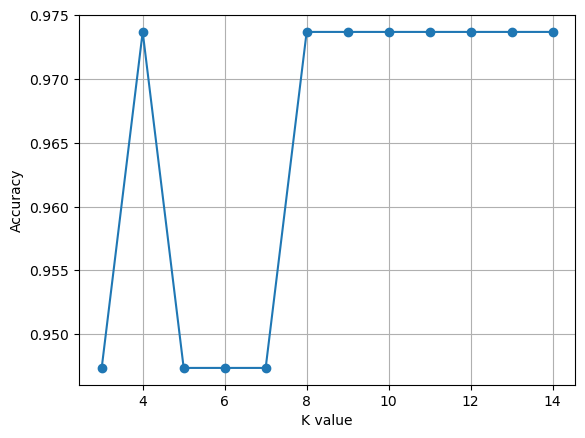

In [87]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [88]:
classifier = KNeighborsClassifier(n_neighbors=8, metric= 'euclidean')
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)
accu = accuracy_score(y_test,y_pred_knn)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [89]:
accu = accuracy_score(y_test,y_pred_knn)

In [90]:
accu

0.9736842105263158

In [91]:
confusion_matrix(y_test,y_pred_knn)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [92]:
print(classification_report(y_test, y_pred_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [93]:
## Predict the flower

In [94]:
x_k= np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

In [95]:
Pred= classifier.predict(x_k)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [96]:

Pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [97]:
confusion_matrix(y_test,y_pred_knn)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [98]:
## SVC model- linear

In [99]:
from sklearn.svm import SVC

In [107]:
svm_cls = SVC(kernel = 'linear')
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [109]:
confusion_matrix(y_test,y_pred_svm)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [110]:
accuracy_score(y_test,y_pred_svm)

1.0

In [111]:
print(classification_report(y_test, y_pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [71]:
## SVC model- rbf

In [117]:
svm_cls_ = SVC(kernel = 'rbf')
svm_cls_ = svm_cls_.fit(x_train,y_train)
y_pred_rbf_ = svm_cls_.predict(x_test)

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [119]:
confusion_matrix(y_test,y_pred_rbf_)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [120]:
accuracy_score(y_test,y_pred_rbf_)

0.9736842105263158

In [122]:
print(classification_report(y_test, y_pred_rbf_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [76]:
## Devcision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train,y_train)
y_pred_dt =dt_cls.predict(x_test)

In [125]:
confusion_matrix(y_test,y_pred_dt)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [126]:
accuracy_score(y_test,y_pred_dt)

1.0

In [127]:
print(classification_report(y_test, y_pred_dt))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [128]:
x_d = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

In [129]:
y_d = dt_cls.predict(x_d)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [130]:
y_d

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [84]:
##Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf =rf_cls.predict(x_test)

In [132]:
confusion_matrix(y_test,y_pred_rf)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [133]:
accuracy_score(y_test,y_pred_rf)

1.0

In [134]:
print(classification_report(y_test,y_pred_rf ))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [135]:
x_test=np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

In [136]:
y_pred_rf=rf_cls.predict(x_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [137]:
y_pred_rf

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [138]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
                  ]

In [ ]:
##Accuracy Percentage of Logistic Regression:0.9736842105263158
##Accuracy Percentage of KNN:0.9736842105263158
##Accuracy Percentage of SVM Linear :1
##Accuracy Percentage of SVM rbf :0.9736842105263158
##Accuracy Percentage of Decision Tree: 1
##Accuracy Percentage of Random Forest: 1

In [ ]:
##Inference: Model SVM Linear Decision Tree and Randonm Forest is with Accurcy of 1